# Real Estate Price Prediction-Part One Data Preprocessing

In [97]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [98]:
# read dataset
df=pd.read_csv ('dataset.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Cleanig the data 1-Handling missing data


In [99]:
#check the percentage of missing data for each feature,drop the fetures with missing >= 50% 
df.isnull().sum()/len(df)

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
society         0.413063
total_sqft      0.000000
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

In [100]:
df=df.drop('society',axis=1)

In [101]:
# find  numerical features to handle it
df_numerical=[column for column in df.columns if df[column].dtype!='O']
df_numerical


['bath', 'balcony', 'price']

In [102]:
# find  category features with null value to handle it
df_category=[column for column in df.columns if df[column].dtype=='O']
df_category

['area_type', 'availability', 'location', 'size', 'total_sqft']

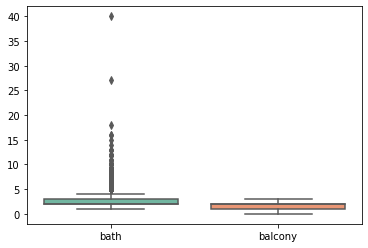

In [103]:
#explore the numerical column
sns.boxplot(data=df[['bath','balcony']],  palette="Set2")

In [104]:
#replace the missing with mean and median based on features distribution
df['bath']=df['bath'].fillna(int(df['bath'].median()))
df['balcony']=df['balcony'].fillna(int(df['balcony'].mean()))
df[df_numerical].isnull().sum()

bath       0
balcony    0
price      0
dtype: int64

In [105]:
#Handle missing data in categories column
df[df_category].isnull().sum()/len(df)

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
total_sqft      0.000000
dtype: float64

In [106]:
# fill nan for size and location with most frequent category,drop society more than 40% missing
df['size']=df['size'].fillna(df['size'].mode()[0])
df['location']=df['location'].fillna(df['location'].mode()[0])

In [107]:
df[df_category].isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
dtype: int64

# 2-handle the inconsistency and redundant in categoy features

In [108]:
# clean size column,some data in format of 2BHK or bedroom
# built function to consider only numbers in size to remove the inconsistency ex,2BHK=2bedroom
def consider_only_numbers(x):
     number=str(x).split()
     return float(number[0])
  

In [109]:
df['size']=df['size'].apply(consider_only_numbers)

In [110]:
# clean total-sqft column, some raw data in range
#write function to convert range to float and if it is not range give non values
def range_float(x):
    numbers = str(x).split("-")
    if len(numbers) == 2:
        return (float(numbers[0]) + float(numbers[1]))/2
    try:
        return float(x)
    except:
        return None

In [111]:
df['total_sqft']=df['total_sqft'].apply(range_float)

In [112]:
# check if the total area hase null value after cleaning
df['total_sqft'].isnull().sum()

46

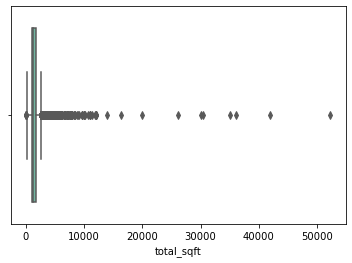

In [113]:
# check the distribution of sqft 
sns.boxplot(df['total_sqft'], palette="Set2")

In [114]:
# since the area clomn contains outlier , handl missing with median
df['total_sqft']=df['total_sqft'].fillna(int(df['total_sqft'].median()))
df['total_sqft'].isnull().sum()

0

# 3-Handling rare categories

In [115]:
df_category=[column for column in df.columns if df[column].dtype=='O']

In [116]:
# check the unique values for category features
for feature in df[df_category]:
    print("The count_unique categories in",feature,'\n',df[feature].value_counts()) 

The count_unique categories in area_type 
 Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
The count_unique categories in availability 
 Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
14-Nov               1
15-Jun               1
16-Jan               1
17-Jan               1
Name: availability, Length: 81, dtype: int64
The count_unique categories in location 
 Whitefield              541
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          273
Thanisandra             234
                       ... 
M.G Road                  1
Off Sarjapur road,        1
P&T Colony                1
PC Palaya                 1
Indira Nagar Stage 2      1
Name: location, Length: 1305, dtype: int64


In [117]:
len(df['availability'].value_counts())

81

In [118]:
 #the house availibility could be ready to move and not ready to move
df['availability'].value_counts()/len(df)


Ready To Move    0.794369
18-Dec           0.023048
18-May           0.022147
18-Apr           0.020345
18-Aug           0.015015
                   ...   
16-Jul           0.000075
14-Nov           0.000075
15-Jun           0.000075
16-Jan           0.000075
17-Jan           0.000075
Name: availability, Length: 81, dtype: float64

In [119]:
y=df['availability'].value_counts()/len(df)

In [120]:
y=y[y>0.79]

 we can apply this function or lambdadef availability (x): 
    if x in y :
     return('ready to move')
    else:
      return('not ready')
df['availability']=df['availability'].apply(availability)
 df['availability'].value_counts()  


In [121]:
df['availability']=df['availability'].apply(lambda x:'ready_to_move' if x in y else 'not_ready')

In [122]:
df['availability'].value_counts()

ready_to_move    10581
not_ready         2739
Name: availability, dtype: int64

In [123]:
#rar in location column,we have 1305 unique, so group the less frequent location(threshold=100)
y=df['location'].value_counts()
y=y[y<50]
df['location']=df['location'].apply(lambda x:'others locations' if x in y else x)

In [124]:
len(df['location'].value_counts())

56

# 4- handling outlier in numerical features

In [125]:
# we have outlier in size, total_sqft and bath,can be eleminated using z or IQR
#using IQR remove data out of lower and upper limit
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,not_ready,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
2,Built-up Area,ready_to_move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,ready_to_move,others locations,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,ready_to_move,Kothanur,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,ready_to_move,Whitefield,2.0,1170.0,2.0,1.0,38.00


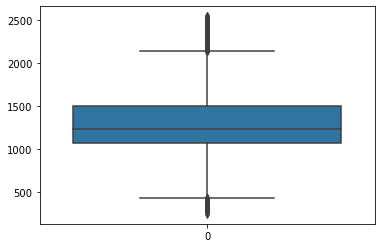

In [126]:
sns.boxplot(data=df['total_sqft'])

In [127]:
# creat new column to remove outliers from price and total area
df['price per sqft'] = (df['price']*100000)/df['total_sqft']


In [128]:
df['price per sqft'].describe()

count    11110.000000
mean      5664.711281
std       2502.118066
min        500.000000
25%       4114.120501
50%       5100.452526
75%       6460.119823
max      44000.000000
Name: price per sqft, dtype: float64

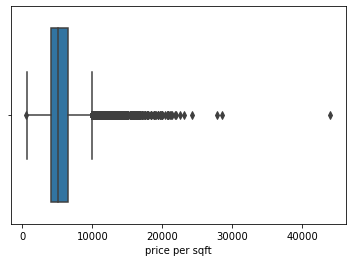

In [129]:
sns.boxplot(df['price per sqft'])

In [130]:
# standard deviation to remove outlier
upper_limit = df['price per sqft'].mean() + 1*df['price per sqft'].std()
lower_limit = df['price per sqft'].mean() - 1*df['price per sqft'].std()
df1= df[(df['price per sqft'] >= lower_limit)]
df=df1[(df1['price per sqft'] <= upper_limit)]

lower_limit
df.shape

(9285, 9)

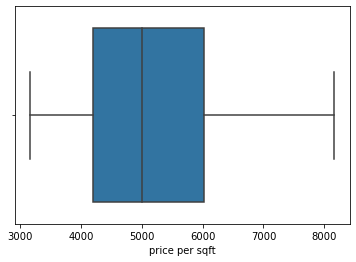

In [131]:
sns.boxplot(df['price per sqft'])

In [132]:
# drop the price per sqft column
df=df.drop('price per sqft',axis=1)

# 4- Encoding category features

In [133]:
# since model understand only numbers, encode all categories to numbers
# for availability & area-type do one hote encoding bcz less categories we have
availability_dum=pd.get_dummies(df['availability'],drop_first=True)
arae_dum=pd.get_dummies(df['area_type'],drop_first=True)


In [134]:
df =pd.concat([df,arae_dum],axis=1)
df =pd.concat([df,availability_dum],axis=1)
#df =pd.concat([df,location_dum],axis=1)

In [135]:
df.drop(['availability','area_type'],inplace=True,axis=1)


In [136]:
#  frequency encoding for location feature, replace each category by its count value
frequency_locations=df['location'].value_counts().to_dict()
df['location']=df['location'].map(frequency_locations)
df.head()

,location,size,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,ready_to_move
0,56,2.0,1056.0,2.0,1.0,39.07,0,0,1,0
2,171,3.0,1440.0,2.0,3.0,62.00,0,0,0,1
3,4552,3.0,1521.0,3.0,1.0,95.00,0,0,1,1
4,56,2.0,1200.0,2.0,1.0,51.00,0,0,1,1
5,409,2.0,1170.0,2.0,1.0,38.00,0,0,1,1


In [137]:
# data now is ready to be used
import pickle
pickle.dump(df,open("df.data","wb"))

In [138]:
#know data is ready to model